<a href="https://colab.research.google.com/github/J4sonN/Arsenal-s-Worst-EPL-Starts/blob/main/Arsenal's_worst_PL_starts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analizing for Arsenal's worst ever Premier League start**

Author: Quan Nguyen  
Date: 4-18-2023

#**Import Libraries**

In [83]:
##Pandas
import pandas as pd
##Numpy
import numpy as np
##Seaborn 
import seaborn as sns
##Matplotlib
import matplotlib.pyplot as plt
##Filter all warnings 
import warnings
warnings.filterwarnings('ignore')

#Load and Inspect Data

In [84]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df = pd.read_excel('/content/drive/MyDrive/04 Week 4: Explanatory Viz/Week51.xlsx')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           29 non-null     object 
 1   Played           29 non-null     int64  
 2   Won              29 non-null     int64  
 3   Drawn            29 non-null     int64  
 4   Lost             29 non-null     int64  
 5   Goals For        29 non-null     int64  
 6   Goals Against    29 non-null     int64  
 7   Goal Difference  29 non-null     int64  
 8   Points           29 non-null     int64  
 9   Position         29 non-null     int64  
 10  Final Points     28 non-null     float64
 11  Final Position   28 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 2.8+ KB


In [87]:
df.head()

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
0,1992/93,19,9,2,8,22,20,2,29,8,56.0,10.0
1,1993/94,21,9,7,5,20,13,7,34,5,71.0,4.0
2,1994/95,19,6,6,7,23,22,1,24,11,51.0,12.0
3,1995/96,18,8,7,3,23,12,11,31,6,63.0,5.0
4,1996/97,17,10,5,2,34,16,18,35,2,68.0,3.0


Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

#Data Cleaning

- Checking how many rows and colums does the dataset has.

In [88]:
df.shape

(29, 12)

In [89]:
print(f"There is {df.shape[0]} rows, and {df.shape[1]} columns in the data")

There is 29 rows, and 12 columns in the data


**Check datatypes of each column**

In [90]:
df.dtypes

Season              object
Played               int64
Won                  int64
Drawn                int64
Lost                 int64
Goals For            int64
Goals Against        int64
Goal Difference      int64
Points               int64
Position             int64
Final Points       float64
Final Position     float64
dtype: object

##Check Duplicates

In [91]:
df.duplicated().sum()

0

There is no duplicates in this data set

##Identify missing values

In [92]:
df.isna().sum()

Season             0
Played             0
Won                0
Drawn              0
Lost               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
Position           0
Final Points       1
Final Position     1
dtype: int64

In [93]:
#locate the row that has missing values
df.loc[df.isna().any(axis=1)]

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
28,2020/21,13,4,2,7,11,16,-5,14,15,NaN,NaN


> research for standings of this seasons shows that Arsenal final position was 8 and final point was 61
https://www.espn.com/soccer/standings/_/league/eng.1/season/2020

In [131]:
df['Final Points'].fillna(61, inplace=True)
df['Final Position'].fillna(8, inplace=True )

In [132]:
print(f'There is {df.isna().sum().sum()} missing value in this data set')

There is 0 missing value in this data set


##Check for inconsitency categories of data

In [133]:
df.describe(include='number')

,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,17.137931,8.862069,4.310345,3.965517,29.344828,17.655172,11.689655,30.862069,4.758621,71.448276,4.034483
std,1.381618,1.940621,1.872802,1.741977,7.266734,4.202685,6.887377,5.323292,3.247583,9.045860,2.638760
min,13.000000,4.000000,2.000000,0.000000,11.000000,10.000000,-5.000000,14.000000,1.000000,51.000000,1.000000
25%,16.000000,8.000000,3.000000,3.000000,24.000000,14.000000,7.000000,29.000000,2.000000,68.000000,2.000000
50%,17.000000,9.000000,4.000000,4.000000,30.000000,18.000000,13.000000,32.000000,5.000000,71.000000,4.000000
75%,18.000000,10.000000,6.000000,5.000000,34.000000,20.000000,16.000000,35.000000,6.000000,78.000000,5.000000
max,21.000000,12.000000,8.000000,8.000000,44.000000,27.000000,22.000000,40.000000,15.000000,90.000000,12.000000


- No issues noted

#Data Analysis

Function for histogram and boxplot

In [134]:
def plot_numeric(df,col):
  ##make the figure and axes sharing the same x-axis
  ## Define a MatplotLib ax object using sns.histplot() & sns.boxplot()
  fig, axes = plt.subplots(nrows = 2,figsize= (8,4), sharex = True)
  ## Use seaborn to build a histogram
  sns.histplot(data = df, x = col, ax = axes[0],kde=True, fill=True)
  mean_value = df[col].mean()
  median_value=df[col].median()
  #add vertical mean value line with red color on histogram graph
  axes[0].axvline(mean_value, color='red',label=f'Mean: {mean_value}', lw=2);
  #add vertical median value line with green color on histogram graph
  axes[0].axvline(median_value, color = 'green',  label = f'Median: {median_value}', ls="--", lw=2);
  ##Creating boxplot with median line is in green color
  sns.boxplot(data = df, x =col, ax = axes[1],
              flierprops={"marker": "x"},
              boxprops={"facecolor": (.2, .3, .4, .5)});
  ##set title for the column in each graphs
  axes[0].set_title(f'Histogram for {col}')
  axes[1].set_title(f'Boxplot for {col}')
  ##change the style and palette of theme of the graph
  sns.set_theme(style="ticks", palette=None)
  ## fixing overlapping labels and showing
  plt.tight_layout()
  plt.show(); 

In [135]:
#print number columns
df.select_dtypes('number').columns

Index(['Played', 'Won', 'Drawn', 'Lost', 'Goals For', 'Goals Against',
       'Goal Difference', 'Points', 'Position', 'Final Points',
       'Final Position'],
      dtype='object')

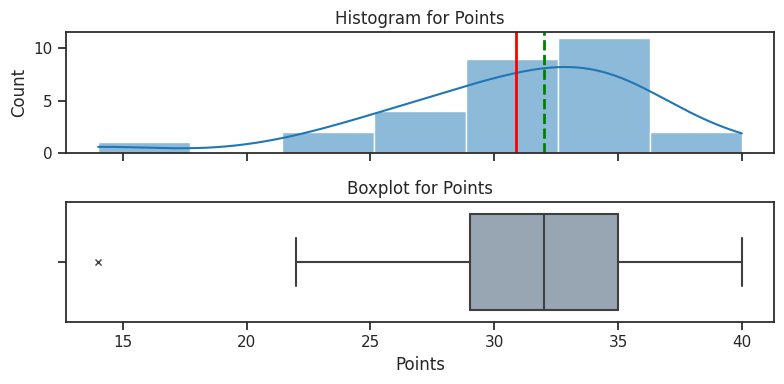

In [141]:
plot_numeric(df,'Points')

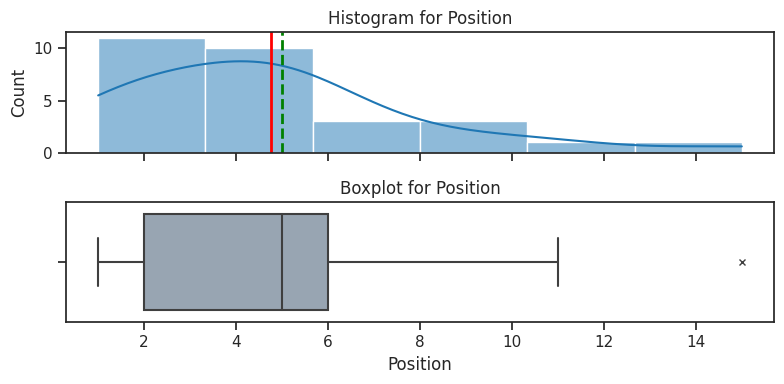

In [143]:
plot_numeric(df,'Position')

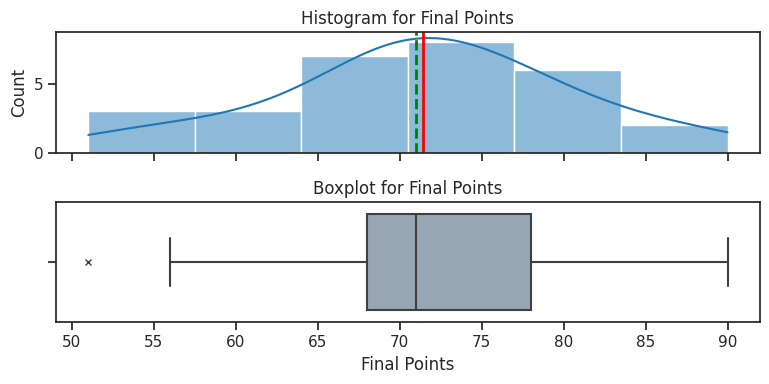

In [138]:
plot_numeric(df,'Final Points')

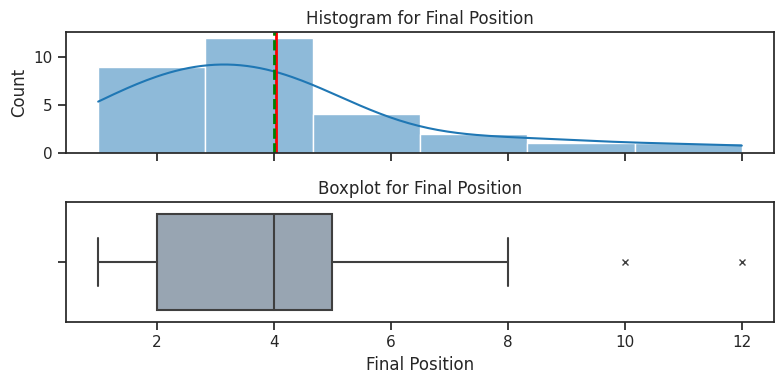

In [139]:
plot_numeric(df,'Final Position')

In [140]:
def plot_bar(df, x):
  ## Define a MatplotLib ax object using sns.barplot()
  ## Use y= to plot the y axis (vertical) values
  ## Use x= to plot the x axis (horizontal) values
  fig, ax= plt.subplots(figsize= (10,12))
  sns.barplot(data = df, x = x, y = df['Season'], ax = ax)
  ##Set title for both columns
  ax.set_title(f'Barplot of {str(x)}', fontsize = 15, fontweight = 'bold');
  ax.set_xlabel(f'{str(x)}')
  plt.show()
  return fig,ax

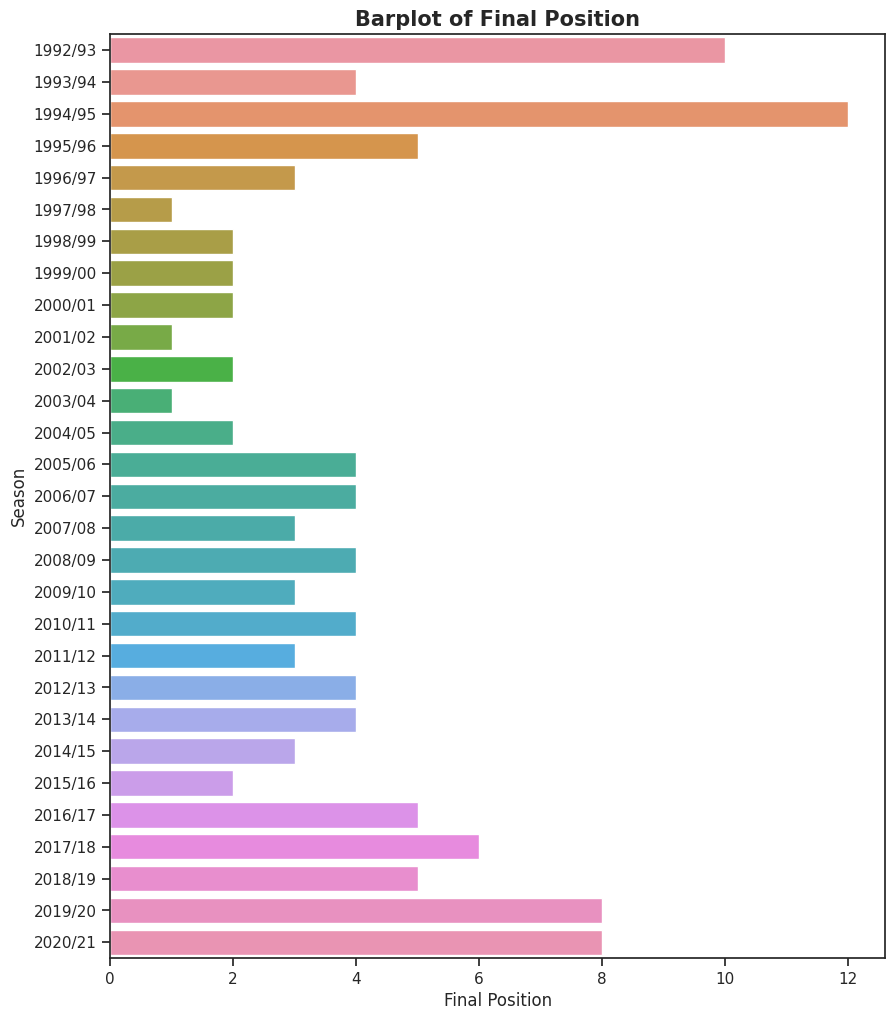

In [111]:
plot_bar(df,'Final Position');

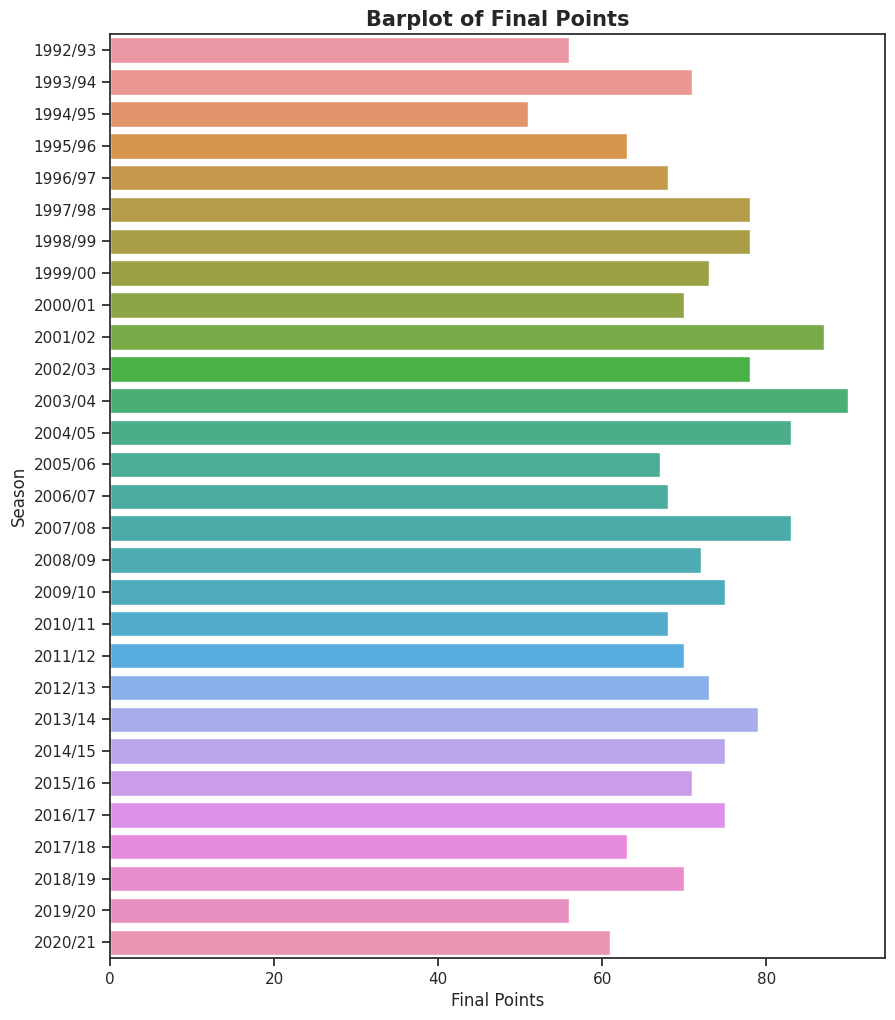

In [144]:
plot_bar(df,'Final Points');

In [128]:
def scatter_plot(df,col,row):
  ## Define a MatplotLib axes object using sns.regplot()
  ## Use y= to plot the y axis (vertical) values
  ## Use x= to plot the x axis (horizontal)  values
  fig, axes = plt.subplots(figsize= (8,4))
  #Creating regression line from seaborn to construct scatter plot with regression line
  sns.regplot(x = col, y = row, data = df, line_kws={'color':'red'},  color='blue')
  ##Set title name for columns and rows
  axes.set_title(f'Scatter for {col} & {row}',fontsize = 20, fontweight = 'bold');
  ## fixing overlapping labels and showing
  plt.tight_layout()
  plt.show()

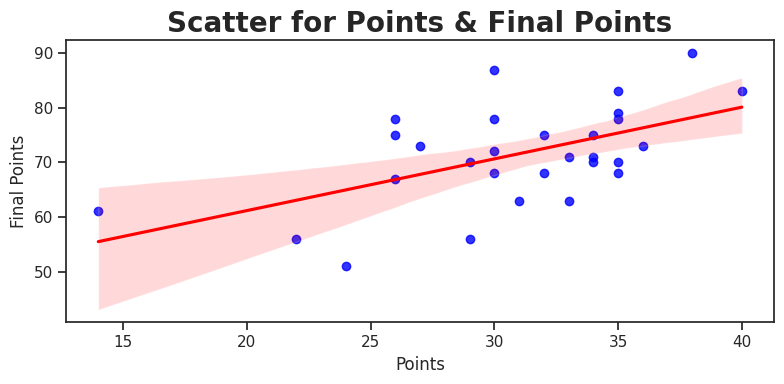

In [129]:
scatter_plot(df,'Points', 'Final Points')

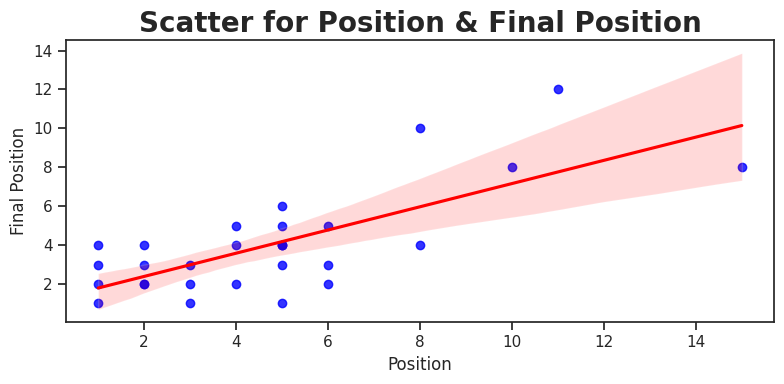

In [130]:
scatter_plot(df,'Position', 'Final Position')

In [145]:
corr = df.corr()
corr

,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
Played,1.000000,0.193833,0.424550,0.120761,0.030666,0.008484,0.027178,0.357163,-0.159467,-0.188012,0.135795
Won,0.193833,1.000000,-0.400524,-0.529694,0.661962,-0.172442,0.803647,0.945358,-0.849831,0.493955,-0.473291
Drawn,0.424550,-0.400524,1.000000,-0.292180,-0.144607,-0.122045,-0.078100,-0.081530,0.077349,0.063172,-0.074511
Lost,0.120761,-0.529694,-0.292180,1.000000,-0.557659,0.330045,-0.789769,-0.682230,0.737103,-0.767317,0.715073
Goals For,0.030666,0.661962,-0.144607,-0.557659,1.000000,0.377082,0.824984,0.666018,-0.684926,0.540338,-0.466274
Goals Against,0.008484,-0.172442,-0.122045,0.330045,0.377082,1.000000,-0.212349,-0.235273,0.271055,-0.236283,0.323155
Goal Difference,0.027178,0.803647,-0.078100,-0.789769,0.824984,-0.212349,1.000000,0.846266,-0.888050,0.714280,-0.689146
Points,0.357163,0.945358,-0.081530,-0.682230,0.666018,-0.235273,0.846266,1.000000,-0.894447,0.557584,-0.538660
Position,-0.159467,-0.849831,0.077349,0.737103,-0.684926,0.271055,-0.888050,-0.894447,1.000000,-0.700084,0.734496
Final Points,-0.188012,0.493955,0.063172,-0.767317,0.540338,-0.236283,0.714280,0.557584,-0.700084,1.000000,-0.849021


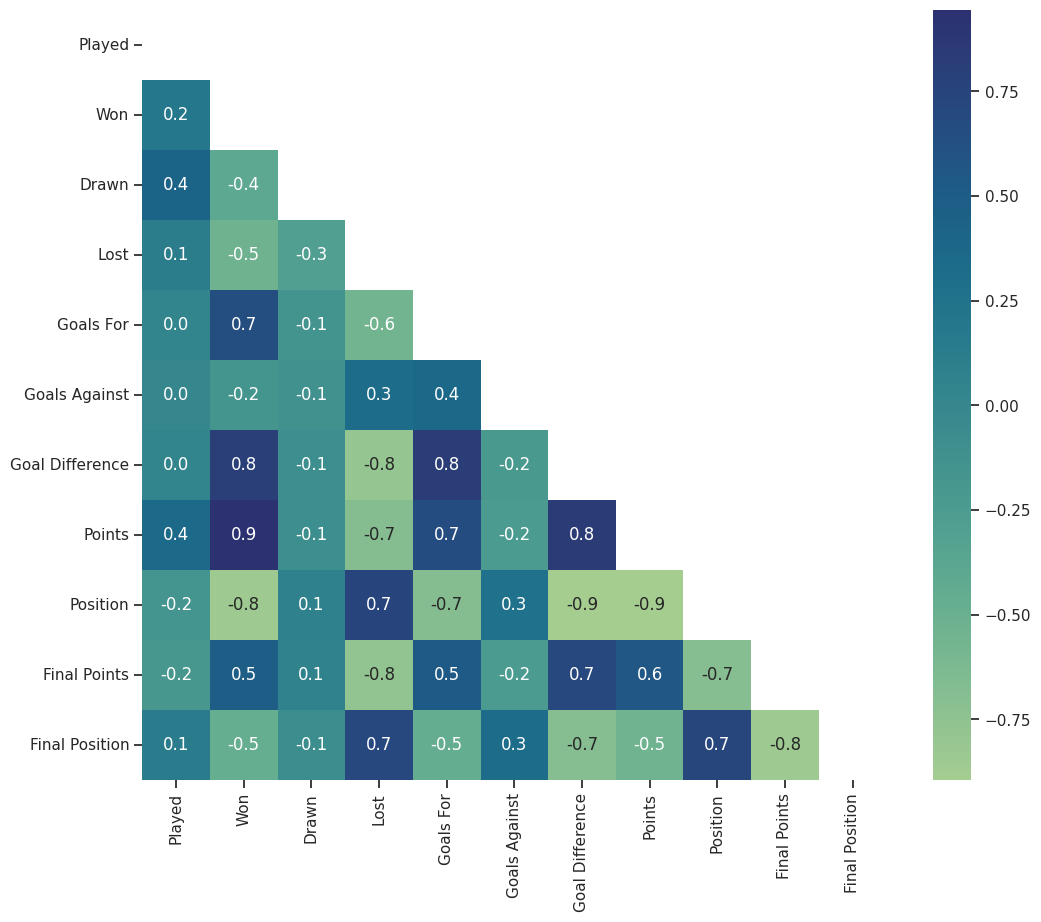

In [146]:
# To get a triangle correlation map and hide duplicate values as well as the diagonal of all the values with themselves, use the mask argument
# We will first define the area to be masked (blocked)
# np.ones_like(corr) creates an array of all 1s of the same shape as the corr dataframe we just made
# np.triu() will just return the upper triangle of any array 
# by masking (blocking) the upper triangle in our heatmap, we are left with only the lower triangle
mask = np.triu(np.ones_like(corr))
## Define MatplotLib fig and ax objects using plt.subplots()
## Use figsize= to set thesize of the figure
fig, ax = plt.subplots(figsize = (12, 10))
## turn on annotation with annot ="True", using fmt  .1f to be able to see only significant correlation
sns.heatmap(corr, cmap="crest", annot = True, fmt ='.1f', mask = mask);